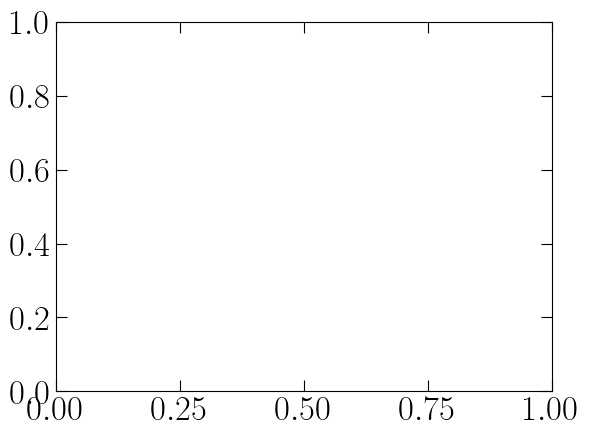

In [29]:
import numpy as np
import scipy
from scipy import stats
import My_Fitting
import qnm
from kuibit import simdir as sd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.colors import LogNorm
import pickle

plt.rcParams["xtick.labelsize"] = 25
plt.rcParams["ytick.labelsize"] = 25
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 8
plt.rcParams["ytick.major.size"] = 8
plt.rcParams["xtick.minor.size"] = 4
plt.rcParams["ytick.minor.size"] = 4
plt.rcParams["xtick.top"] = True
plt.rcParams["ytick.right"] = True
plt.rcParams["axes.labelpad"] = 8
plt.rcParams["figure.constrained_layout.h_pad"] = 0
plt.rcParams["text.usetex"] = True
plt.rcParams["font.sans-serif"] = ["Times New Roman"]
plt.rcParams["mathtext.fontset"] = "stix"
plt.tick_params(axis="both", which="minor", labelsize=18)

In [42]:
name_list=["o5","o10","o20","o30","s5","s10","s20","s30"]

np.random.seed(42)
for i_name in range(len(name_list)):
    with sd.SimDir("/home/yuntian/vscode_codes/QNM_compare/Kerr_Newman/"+name_list[i_name],\
                   pickle_file="/home/yuntian/vscode_codes/QNM_compare/Kerr_Newman/"+name_list[i_name]+".pickle") as sim:
        pass

    timeseries=sim.ts
    m1=timeseries.scalar["qlm_mass[0]"]
    m2=timeseries.scalar["qlm_mass[1]"]
    mt=timeseries.scalar["qlm_mass[2]"]
    s1=timeseries.scalar["qlm_spin[0]"]
    s2=timeseries.scalar["qlm_spin[1]"]
    s=timeseries.scalar["qlm_spin[2]"]
    q1=timeseries.scalar["qlm_charge[0]"]
    q2=timeseries.scalar["qlm_charge[1]"]
    q=timeseries.scalar["qlm_charge[2]"]

    psi4=sim.multipoles["psi4"][110.69]
    psi4_22=psi4[2,2]

    t=np.zeros(len(psi4_22.t))
    psi4_22_r=np.zeros(len(psi4_22.t))
    psi4_22_i=np.zeros(len(psi4_22.t))
    psi4_22_abs=np.zeros(len(psi4_22.t))

    for i in range(len(psi4_22.t)):
        t[i]=psi4_22.t[i]
        psi4_22_r[i]=psi4_22(psi4_22.t[i]).real
        psi4_22_i[i]=psi4_22(psi4_22.t[i]).imag
        psi4_22_abs[i]=(psi4_22_r[i]**2+psi4_22_i[i]**2)**(1/2)

    t_peak=t[np.argmax(psi4_22_abs)]
    index1=np.argmin(np.abs(t-t_peak))
    index2=np.argmin(np.abs(t-t_peak-100))+1
    t0_arr=np.linspace(0, 50, num = 501)

    params_fit=My_Fitting.fit_modes(t[index1:index2]-t_peak,psi4_22_r[index1:index2],psi4_22_i[index1:index2],t0_arr,\
                                N_guess=5,N_free=4,N_fix=0,omega_fix=[],pert=0,N_pert_guess=1,max_nfev=200000)

    with open("data_kerr_newman/"+name_list[i_name]+"_"+"220"+f"_N_free_{4}_pert_0.pkl",'wb') as file:
        pickle.dump(params_fit,file)

initial guess:


100%|██████████| 5/5 [00:01<00:00,  3.72it/s]


initial guess index:  1
min loss: 2.818299469225689e-11
fitting for N_free =  4


100%|██████████| 501/501 [00:17<00:00, 28.01it/s]


initial guess:


100%|██████████| 5/5 [00:01<00:00,  4.91it/s]


initial guess index:  4
min loss: 8.118578316479503e-11
fitting for N_free =  4


100%|██████████| 501/501 [00:14<00:00, 35.12it/s]


initial guess:


100%|██████████| 5/5 [00:01<00:00,  4.04it/s]


initial guess index:  0
min loss: 2.4768652799305278e-11
fitting for N_free =  4


100%|██████████| 501/501 [00:13<00:00, 36.19it/s]


initial guess:


100%|██████████| 5/5 [00:00<00:00,  6.94it/s]


initial guess index:  2
min loss: 2.7634182489231317e-11
fitting for N_free =  4


100%|██████████| 501/501 [00:17<00:00, 28.78it/s]


initial guess:


100%|██████████| 5/5 [00:00<00:00,  6.22it/s]


initial guess index:  4
min loss: 2.3086373764619296e-11
fitting for N_free =  4


100%|██████████| 501/501 [00:13<00:00, 36.38it/s]


initial guess:


100%|██████████| 5/5 [00:00<00:00,  8.91it/s]


initial guess index:  2
min loss: 2.2184890435297778e-11
fitting for N_free =  4


100%|██████████| 501/501 [00:17<00:00, 28.90it/s]


initial guess:


100%|██████████| 5/5 [00:01<00:00,  3.77it/s]


initial guess index:  3
min loss: 2.722628500932594e-11
fitting for N_free =  4


100%|██████████| 501/501 [00:13<00:00, 36.05it/s]


initial guess:


100%|██████████| 5/5 [00:01<00:00,  2.96it/s]


initial guess index:  3
min loss: 2.9915434015637745e-11
fitting for N_free =  4


100%|██████████| 501/501 [00:16<00:00, 29.47it/s]


In [4]:
#稳定性设置
beta_r=1
beta_i=1
beta_A=1
beta_phi=1.5 

A_tol=1e-3
r_tol=0.05 
i_tol=0.05

p_stable=0.95

e_stable=0.2 

#稳定性计算
def stable_cal(k,N_fix,params_fit_cut):
    A_list=np.zeros(len(params_fit_cut))
    phi_list_1=np.zeros(len(params_fit_cut))
    phi_list_2=np.zeros(len(params_fit_cut))
    r_list=np.zeros(len(params_fit_cut))
    i_list=np.zeros(len(params_fit_cut))

    for i in range(len(params_fit_cut)):
        A_list[i]=params_fit_cut[i][2*N_fix+4*k]
        phi_list_1[i]=params_fit_cut[i][2*N_fix+4*k+1]
        phi_list_2[i]=params_fit_cut[i][2*N_fix+4*k+1]+np.pi
        r_list[i]=params_fit_cut[i][2*N_fix+4*k+2]
        i_list[i]=params_fit_cut[i][2*N_fix+4*k+3]

        if A_list[i]<0:
            A_list[i]*=-1
            phi_list_1[i]+=np.pi
            phi_list_2[i]+=np.pi

        phi_list_1[i]%=2*np.pi
        phi_list_2[i]%=2*np.pi
    
    d_A=np.percentile(A_list,100-100*(1-p_stable)/2)-np.percentile(A_list,100*(1-p_stable)/2)
    d_phi_1=np.percentile(phi_list_1,100-100*(1-p_stable)/2)-np.percentile(phi_list_1,100*(1-p_stable)/2)
    d_phi_2=np.percentile(phi_list_2,100-100*(1-p_stable)/2)-np.percentile(phi_list_2,100*(1-p_stable)/2)
    d_phi=min(np.abs(d_phi_1),np.abs(d_phi_2))
    d_r=np.percentile(r_list,100-100*(1-p_stable)/2)-np.percentile(r_list,100*(1-p_stable)/2)
    d_i=np.percentile(i_list,100-100*(1-p_stable)/2)-np.percentile(i_list,100*(1-p_stable)/2)

    A_k=max(A_tol,np.abs(np.percentile(A_list,50)))
    phi_k=2*np.pi
    r_k=max(r_tol,np.abs(np.percentile(r_list,50)))
    i_k=max(i_tol,np.abs(np.percentile(i_list,50)))

    delta_A=beta_A*d_A/A_k
    delta_phi=beta_phi*d_phi/phi_k
    delta_r=beta_r*d_r/r_k
    delta_i=beta_i*d_i/i_k

    delta_k=(delta_A**2+delta_phi**2+delta_r**2+delta_i**2)**(1/2)

    if(np.abs(d_phi_1)<np.abs(d_phi_2)):
        phi_list=phi_list_1
    else:
        phi_list=phi_list_2-np.pi

    return [delta_k,np.percentile(r_list,50),np.percentile(r_list,100-100*(1-p_stable)/2),np.percentile(r_list,100*(1-p_stable)/2),\
                    np.percentile(i_list,50),np.percentile(i_list,100-100*(1-p_stable)/2),np.percentile(i_list,100*(1-p_stable)/2),\
                    np.percentile(A_list,50),np.percentile(A_list,100-100*(1-p_stable)/2),np.percentile(A_list,100*(1-p_stable)/2),\
                np.percentile(phi_list,50),np.percentile(phi_list,100-100*(1-p_stable)/2),np.percentile(phi_list,100*(1-p_stable)/2)]

In [43]:
e_live=0.1
N_tau=200
e_sta=0.2
N_free=4
N_fix=0
l=2
m=2
name_list=["1","5","10","20","30","o5","o10","o20","o30","s5","s10","s20","s30"]

mode_record=np.zeros([len(name_list),1+3*4])
for i_name in range(len(name_list)):
    with open("data_kerr_newman/"+name_list[i_name]+"_"+"220"+f"_N_free_{4}_pert_0.pkl",'rb') as file:
        params_fit=pickle.load(file)

    living_time_list=np.zeros(N_free)

    with sd.SimDir("/home/yuntian/vscode_codes/QNM_compare/Kerr_Newman/"+name_list[i_name],\
                   pickle_file="/home/yuntian/vscode_codes/QNM_compare/Kerr_Newman/"+name_list[i_name]+".pickle") as sim:
        pass
    timeseries=sim.ts
    m1=timeseries.scalar["qlm_mass[0]"]
    m2=timeseries.scalar["qlm_mass[1]"]
    mt=timeseries.scalar["qlm_mass[2]"]
    s1=timeseries.scalar["qlm_spin[0]"]
    s2=timeseries.scalar["qlm_spin[1]"]
    s=timeseries.scalar["qlm_spin[2]"]
    q1=timeseries.scalar["qlm_charge[0]"]
    q2=timeseries.scalar["qlm_charge[1]"]
    q=timeseries.scalar["qlm_charge[2]"]
    psi4=sim.multipoles["psi4"][110.69]
    psi4_22=psi4[2,2]

    t=np.zeros(len(psi4_22.t))
    psi4_22_r=np.zeros(len(psi4_22.t))
    psi4_22_i=np.zeros(len(psi4_22.t))
    psi4_22_abs=np.zeros(len(psi4_22.t))

    for i in range(len(psi4_22.t)):
        t[i]=psi4_22.t[i]
        psi4_22_r[i]=psi4_22(psi4_22.t[i]).real
        psi4_22_i[i]=psi4_22(psi4_22.t[i]).imag
        psi4_22_abs[i]=(psi4_22_r[i]**2+psi4_22_i[i]**2)**(1/2)

    t_peak=t[np.argmax(psi4_22_abs)]
    index1=np.argmin(np.abs(t-t_peak))
    index2=np.argmin(np.abs(t-t_peak-100))+1
    t0_arr=np.linspace(0, 50, num = 501)

    M=1
    if(t_peak+100<t[-1]):
        M_f=mt(t_peak+100)
        a_f=s(t_peak+100)/M_f**2
        q_f=q(t_peak+100)/M_f 
    else:
        print("for "+name_list[i_name]+", t_peak = ",t_peak, "t_max = ",t[-1])
        M_f=mt(t[index2-1])
        a_f=s(t[index2-1])/M_f**2
        q_f=q(t[index2-1])/M_f 
    
    if(np.isnan(M_f) or np.isnan(a_f) or np.isnan(q_f)):
        print("for "+name_list[i_name]+"t_peak+100 gives nan")
        M_f=mt(t[index2-1])
        a_f=s(t[index2-1])/M_f**2
        q_f=q(t[index2-1])/M_f 

    print(M_f,a_f,q_f)


    omega_GR_0=qnm.modes_cache(s=-2,l=l,m=m,n=0)(a=a_f)[0]/M_f*M

    for j in range(N_free):
        for k in range(len(t0_arr)):
            if(np.abs((params_fit[k][2*N_fix+4*j+2]-omega_GR_0.real)/(omega_GR_0.real))<e_live and np.abs((params_fit[k][2*N_fix+4*j+3]-omega_GR_0.imag)/(omega_GR_0.imag))<e_live):
                living_time_list[j]+=1
    
    find_mode=0
    for j in range(len(t0_arr)-N_tau+1):
        res=stable_cal(np.argmax(living_time_list),N_fix,params_fit[j:j+N_tau+1])
        # if(np.abs((res[1]-omega_GR_0.real)/omega_GR_0.real)<e_sta and np.abs((res[4]-omega_GR_0.imag)/omega_GR_0.imag)<e_sta):
        if(1):
            if(find_mode==0):
                for i_rec in range(len(mode_record[0,:])):
                    mode_record[i_name,i_rec]=res[i_rec]
                find_mode=1
            else:
                if(res[0]<mode_record[i_name,0]):
                    for i_rec in range(len(mode_record[0,:])):
                        mode_record[i_name,i_rec]=res[i_rec]
print(mode_record)

0.952833505851356 0.6803401672459364 0.010251868839038999
0.952868693574983 0.6794541988783948 0.05125739804848134
0.953006273171522 0.6766740802439305 0.102500861135163
0.953488398133397 0.6652260442352811 0.20490605229519546
0.95436711276988 0.6459905560751606 0.30708216824199364
0.952617385076973 0.6805751617824812 0.00566648914416474
0.951971246477507 0.6811801359422343 0.011340952592949552
0.949429285811496 0.6832780965051314 0.022742779726172474
0.945111704676538 0.6870465938103325 0.03426322976267843
0.952781120524016 0.6801857318548776 0.028463954324382215
0.952652729927978 0.6795603017223052 0.056935468625662476
0.952089503471085 0.6770594178620906 0.11393950759403322
0.951181351566426 0.6729401945880699 0.17107283549533647
[[ 0.00000000e+00  5.49904104e-01  5.49904104e-01  5.49904104e-01
  -8.58831158e-02 -8.58831158e-02 -8.58831158e-02  1.24061070e-03
   1.24061070e-03  1.24061070e-03  2.95917184e+00  2.95917184e+00
   2.95917184e+00]
 [ 2.93923204e-02  5.50251492e-01  5.507

In [15]:
# 来定义220模的拟合
bkj_220r=[[1.0,       0.537583,   -2.990402,  1.503421],
     [-1.899567, -2.128633,  6.626680,   -2.903790],
     [1.015454,  2.147094,   -4.672847,  1.891731],
     [-0.111430, -0.581706,  1.021061,   -0.414517]]

ckj_220r=[[1.0,          0.548651,   -3.141145,  1.636377],
     [-2.238461,    -2.291933,  7.695570,   -3.458474],
     [1.581677,     2.662938,   -6.256090,  2.494264],
     [-0.341455,    -0.930069,  1.688288,   -0.612643]]

bkj_220i=[[1.0,          -2.721789,     2.472860,      -0.750015],
          [-2.533958,    7.181110,      -6.870324,     2.214689],
          [2.102750,     -6.317887,     6.206452,      -1.980749],
          [-0.568636,    1.857404,      -1.820547,     0.554722]]

ckj_220i=[[1.0,          -2.732346,     2.495049,      -0.761581],
          [-2.498341,    7.089542,      -6.781334,     2.181880],
          [2.056918,     -6.149334,     6.010021,      -1.909275],
          [-0.557557,    1.786783,      -1.734461,     0.524997]]

# 330
bkj_330r=[[1.0,         -0.311963,      -1.457057,      0.825692],
          [-1.928277,   -0.026433,      3.139427,       -1.484557],
          [1.044039,    0.545708,       -2.188569,      0.940019],
          [-0.112303,   -0.226402,      0.482482,       -0.204299]]

ckj_330r=[[1.0,         -0.299153,      -1.591595,      0.938987],
          [-2.265230,   0.058508,       3.772084,       -1.852247],
          [1.624332,    0.533096,       -3.007197,      1.285026],
          [-0.357651,   -0.300599,      0.810387,       -0.314715]]

bkj_330i=[[1.0,         -2.813977,      2.666759,       -0.850618],
          [-2.163575,   6.934304,       -7.425335,      2.640936],
          [1.405496,    -5.678573,      6.621826,       -2.345713],
          [-0.241561,   1.555843,       -1.890365,      0.637480]]

ckj_330i=[[1.0,         -2.820763,      2.680557,       -0.857462],
          [-2.130446,   6.825101,       -7.291058,      2.583282],
          [1.394144,    -5.533669,      6.393699,       -2.254239],
          [-0.261229,   1.517744,       -1.810579,      0.608393]]

# 221
bkj_221r=[[1.0,         -2.918987,      2.866252,       -0.944554],
          [-1.850299,   7.321955,       -8.783456,      3.292966],
          [0.944088,    -5.584876,      7.675096,       -3.039132],
          [-0.088458,   1.198758,       -1.973222,      0.838109]]

ckj_221r=[[1.0,         -2.941138,      2.907859,       -0.964407],
          [-2.250169,   8.425183,       -9.852886,      3.660289],
          [1.611393,    -7.869432,      9.999751,       -3.737205],
          [-0.359285,   2.392321,       -3.154979,      1.129776]]

bkj_221i=[[1.0,         -3.074983,      3.182195,       -1.105297],
          [0.366066,    4.296285,       -9.700146,      5.016955],
          [-3.290350,   -0.844265,      9.999863,       -5.818349],
          [1.927196,    -0.401520,      -3.537667,      2.077991]]

ckj_221i=[[1.0,         -3.079686,      3.191889,       -1.110140],
          [0.388928,    4.159242,       -9.474149,      4.904881],
          [-3.119527,   -0.914668,      9.767356,       -5.690517],
          [1.746957,    -0.240680,      -3.505359,     2.049254]]

-0.00010743254137646208 -5.0367670646145335e-05
0.00020998374234948436 0.00038857256631752435
0.000812747611946163 0.0018452379868127977
-0.0003963691239150524 0.007532528941493699
-0.0008278698409452945 0.016577486664000607
-0.0008830540550431865 -5.754134377844444e-05
0.004037642215737769 -4.871073079104615e-05
-0.0005474660583995039 9.197992624554452e-06
0.0010310416765973995 0.00012444422367097197
-3.581075280534307e-06 6.171780346342359e-05
8.436414676749049e-05 0.0005019850827903127
-0.0001660220512851307 0.002314429439237431
-0.0005419945578944985 0.005333314405534417


Text(0, 0.5, '$\\chi_f$')

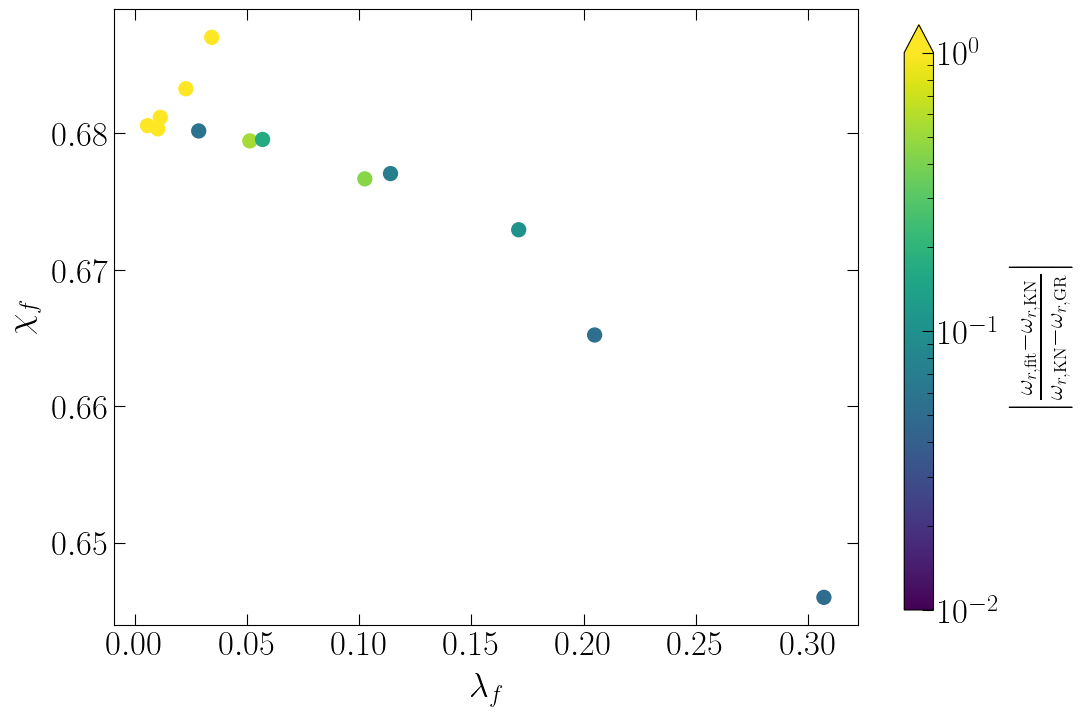

In [44]:
name_list=["1","5","10","20","30","o5","o10","o20","o30","s5","s10","s20","s30"]
q_f_list=np.zeros(len(name_list))
a_f_list=np.zeros(len(name_list))
z=np.zeros(len(name_list))
sizes=np.zeros(len(name_list))

for i_name in range(len(name_list)):
    with sd.SimDir("/home/yuntian/vscode_codes/QNM_compare/Kerr_Newman/"+name_list[i_name],\
                   pickle_file="/home/yuntian/vscode_codes/QNM_compare/Kerr_Newman/"+name_list[i_name]+".pickle") as sim:
        pass
    timeseries=sim.ts
    m1=timeseries.scalar["qlm_mass[0]"]
    m2=timeseries.scalar["qlm_mass[1]"]
    mt=timeseries.scalar["qlm_mass[2]"]
    s1=timeseries.scalar["qlm_spin[0]"]
    s2=timeseries.scalar["qlm_spin[1]"]
    s=timeseries.scalar["qlm_spin[2]"]
    q1=timeseries.scalar["qlm_charge[0]"]
    q2=timeseries.scalar["qlm_charge[1]"]
    q=timeseries.scalar["qlm_charge[2]"]
    psi4=sim.multipoles["psi4"][110.69]
    psi4_22=psi4[2,2]

    t=np.zeros(len(psi4_22.t))
    psi4_22_r=np.zeros(len(psi4_22.t))
    psi4_22_i=np.zeros(len(psi4_22.t))
    psi4_22_abs=np.zeros(len(psi4_22.t))

    for i in range(len(psi4_22.t)):
        t[i]=psi4_22.t[i]
        psi4_22_r[i]=psi4_22(psi4_22.t[i]).real
        psi4_22_i[i]=psi4_22(psi4_22.t[i]).imag
        psi4_22_abs[i]=(psi4_22_r[i]**2+psi4_22_i[i]**2)**(1/2)

    t_peak=t[np.argmax(psi4_22_abs)]
    index1=np.argmin(np.abs(t-t_peak))
    index2=np.argmin(np.abs(t-t_peak-100))+1
    t0_arr=np.linspace(0, 50, num = 501)

    M=1
    if(t_peak+100<t[-1]):
        M_f=mt(t_peak+100)
        a_f=s(t_peak+100)/M_f**2
        q_f=q(t_peak+100)/M_f 
    else:
        print("for "+name_list[i_name]+", t_peak = ",t_peak, "t_max = ",t[-1])
        M_f=mt(t[index2-1])
        a_f=s(t[index2-1])/M_f**2
        q_f=q(t[index2-1])/M_f 
    
    if(np.isnan(M_f) or np.isnan(a_f) or np.isnan(q_f)):
        print("for "+name_list[i_name]+"t_peak+100 gives nan")
        M_f=mt(t[index2-1])
        a_f=s(t[index2-1])/M_f**2
        q_f=q(t[index2-1])/M_f 

    q_f_list[i_name]=q_f
    a_f_list[i_name]=a_f
    sizes[i_name]=100
    omega_GR_r=(qnm.modes_cache(s=-2,l=2,m=2,n=0)(a=a_f)[0]/M_f*M).real

    num=0
    den=0
    for k in range(4):
        for j in range(4):
            num+=bkj_220r[k][j]*a_f**k*q_f**j
            den+=ckj_220r[k][j]*a_f**k*q_f**j

    omega_KN_r=(qnm.modes_cache(s=-2,l=2,m=2,n=0)(a=0)[0].real*num/den)/M_f*M

    omega_fit_r=mode_record[i_name,1]
    z[i_name]=np.abs((omega_fit_r-omega_KN_r)/(omega_KN_r-omega_GR_r))
    print(omega_fit_r-omega_KN_r,omega_KN_r-omega_GR_r)

    # plt.plot(q_f,a_f,'.',markersize=20)

fig, ax =plt.subplots(1,1,figsize=(12,8), sharex=True, sharey=True)
sc1=[]
sc1.append(ax.scatter(q_f_list,a_f_list,c=z,s=sizes,cmap='viridis',norm=LogNorm(vmin=0.01,vmax=1)))
cbar1 = plt.colorbar(sc1[0], ax=ax, extend='max', shrink=0.95)
cbar1.set_label(r"$\left|\frac{\omega_{r,{\rm fit}}-\omega_{r,{\rm KN}}}{\omega_{r,{\rm KN}}-\omega_{r,{\rm GR}}}\right|$",fontsize=25)
# sc1[0].set_clim(0,0.1)
ax.set_xlabel(r"$\lambda_f$",fontsize=25)
ax.set_ylabel(r"$\chi_f$",fontsize=25)

-0.00042161911684084064 7.391392685252018e-05
-0.0006263845477601643 6.03305151750666e-05
0.001735178029937362 9.105604421456859e-05
0.0009500002508908839 0.00032419030873727384
0.0006134796022295858 0.0007966420448064226
0.00025857861843832375 7.7258220071999e-05
-0.007610952428015932 7.254137993807641e-05
0.00032986786091941667 6.448817425093456e-05
0.00039524334552969165 5.8536213442136886e-05
-1.6848653206322228e-05 6.382636245433337e-05
9.222604439136639e-05 6.097858518649968e-05
0.0005590179529906952 0.00010661285245229524
-8.403466823166117e-05 0.0002286018899237685


Text(0, 0.5, '$\\chi_f$')

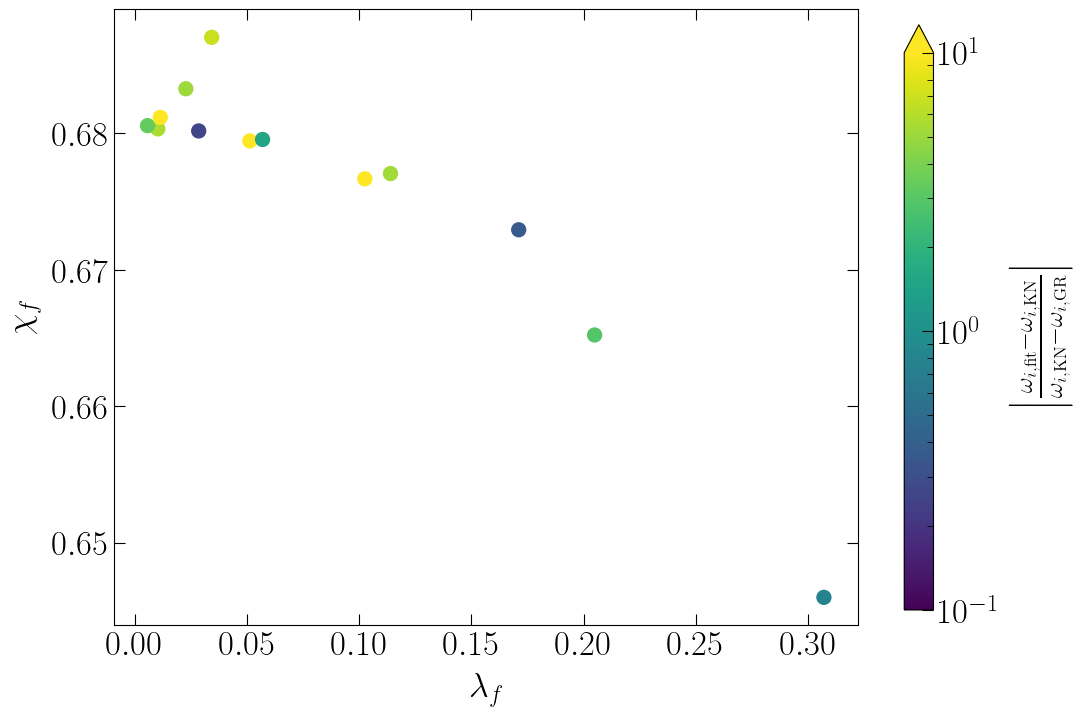

In [45]:
name_list=["1","5","10","20","30","o5","o10","o20","o30","s5","s10","s20","s30"]
q_f_list=np.zeros(len(name_list))
a_f_list=np.zeros(len(name_list))
z=np.zeros(len(name_list))
sizes=np.zeros(len(name_list))

for i_name in range(len(name_list)):
    with sd.SimDir("/home/yuntian/vscode_codes/QNM_compare/Kerr_Newman/"+name_list[i_name],\
                   pickle_file="/home/yuntian/vscode_codes/QNM_compare/Kerr_Newman/"+name_list[i_name]+".pickle") as sim:
        pass
    timeseries=sim.ts
    m1=timeseries.scalar["qlm_mass[0]"]
    m2=timeseries.scalar["qlm_mass[1]"]
    mt=timeseries.scalar["qlm_mass[2]"]
    s1=timeseries.scalar["qlm_spin[0]"]
    s2=timeseries.scalar["qlm_spin[1]"]
    s=timeseries.scalar["qlm_spin[2]"]
    q1=timeseries.scalar["qlm_charge[0]"]
    q2=timeseries.scalar["qlm_charge[1]"]
    q=timeseries.scalar["qlm_charge[2]"]
    psi4=sim.multipoles["psi4"][110.69]
    psi4_22=psi4[2,2]

    t=np.zeros(len(psi4_22.t))
    psi4_22_r=np.zeros(len(psi4_22.t))
    psi4_22_i=np.zeros(len(psi4_22.t))
    psi4_22_abs=np.zeros(len(psi4_22.t))

    for i in range(len(psi4_22.t)):
        t[i]=psi4_22.t[i]
        psi4_22_r[i]=psi4_22(psi4_22.t[i]).real
        psi4_22_i[i]=psi4_22(psi4_22.t[i]).imag
        psi4_22_abs[i]=(psi4_22_r[i]**2+psi4_22_i[i]**2)**(1/2)

    t_peak=t[np.argmax(psi4_22_abs)]
    index1=np.argmin(np.abs(t-t_peak))
    index2=np.argmin(np.abs(t-t_peak-100))+1
    t0_arr=np.linspace(0, 50, num = 501)

    M=1
    if(t_peak+100<t[-1]):
        M_f=mt(t_peak+100)
        a_f=s(t_peak+100)/M_f**2
        q_f=q(t_peak+100)/M_f 
    else:
        print("for "+name_list[i_name]+", t_peak = ",t_peak, "t_max = ",t[-1])
        M_f=mt(t[index2-1])
        a_f=s(t[index2-1])/M_f**2
        q_f=q(t[index2-1])/M_f 
    
    if(np.isnan(M_f) or np.isnan(a_f) or np.isnan(q_f)):
        print("for "+name_list[i_name]+"t_peak+100 gives nan")
        M_f=mt(t[index2-1])
        a_f=s(t[index2-1])/M_f**2
        q_f=q(t[index2-1])/M_f 

    q_f_list[i_name]=q_f
    a_f_list[i_name]=a_f
    sizes[i_name]=100
    omega_GR_i=(qnm.modes_cache(s=-2,l=2,m=2,n=0)(a=a_f)[0]/M_f*M).imag

    num=0
    den=0
    for k in range(4):
        for j in range(4):
            num+=bkj_220i[k][j]*a_f**k*q_f**j
            den+=ckj_220i[k][j]*a_f**k*q_f**j

    omega_KN_i=(qnm.modes_cache(s=-2,l=2,m=2,n=0)(a=0)[0].imag*num/den)/M_f*M

    omega_fit_i=mode_record[i_name,4]
    z[i_name]=np.abs((omega_fit_i-omega_KN_i)/(omega_KN_i-omega_GR_i))
    print(omega_fit_i-omega_KN_i,omega_KN_i-omega_GR_i)

    # plt.plot(q_f,a_f,'.',markersize=20)

fig, ax =plt.subplots(1,1,figsize=(12,8), sharex=True, sharey=True)
sc1=[]
sc1.append(ax.scatter(q_f_list,a_f_list,c=z,s=sizes,cmap='viridis',norm=LogNorm(vmin=0.1,vmax=10)))
cbar1 = plt.colorbar(sc1[0], ax=ax, extend='max', shrink=0.95)
cbar1.set_label(r"$\left|\frac{\omega_{i,{\rm fit}}-\omega_{i,{\rm KN}}}{\omega_{i,{\rm KN}}-\omega_{i,{\rm GR}}}\right|$",fontsize=25)
# sc1[0].set_clim(0,0.1)
ax.set_xlabel(r"$\lambda_f$",fontsize=25)
ax.set_ylabel(r"$\chi_f$",fontsize=25)

Text(0, 0.5, '$\\chi_f$')

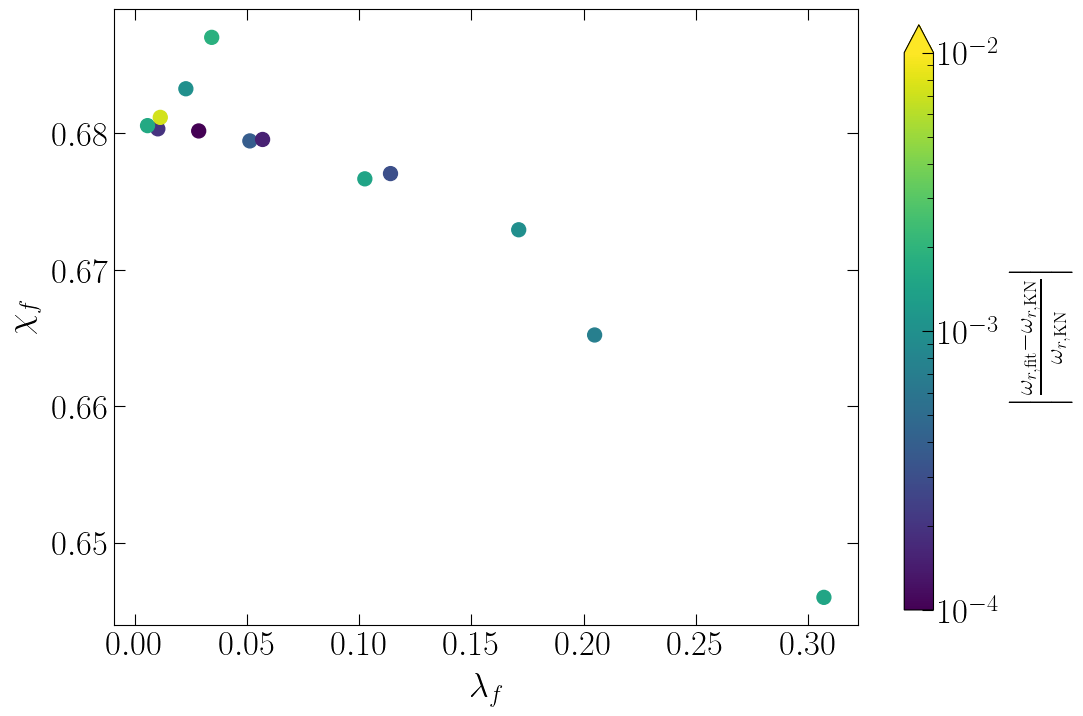

In [46]:
name_list=["1","5","10","20","30","o5","o10","o20","o30","s5","s10","s20","s30"]
q_f_list=np.zeros(len(name_list))
a_f_list=np.zeros(len(name_list))
z=np.zeros(len(name_list))
sizes=np.zeros(len(name_list))

for i_name in range(len(name_list)):
    with sd.SimDir("/home/yuntian/vscode_codes/QNM_compare/Kerr_Newman/"+name_list[i_name],\
                   pickle_file="/home/yuntian/vscode_codes/QNM_compare/Kerr_Newman/"+name_list[i_name]+".pickle") as sim:
        pass
    timeseries=sim.ts
    m1=timeseries.scalar["qlm_mass[0]"]
    m2=timeseries.scalar["qlm_mass[1]"]
    mt=timeseries.scalar["qlm_mass[2]"]
    s1=timeseries.scalar["qlm_spin[0]"]
    s2=timeseries.scalar["qlm_spin[1]"]
    s=timeseries.scalar["qlm_spin[2]"]
    q1=timeseries.scalar["qlm_charge[0]"]
    q2=timeseries.scalar["qlm_charge[1]"]
    q=timeseries.scalar["qlm_charge[2]"]
    psi4=sim.multipoles["psi4"][110.69]
    psi4_22=psi4[2,2]

    t=np.zeros(len(psi4_22.t))
    psi4_22_r=np.zeros(len(psi4_22.t))
    psi4_22_i=np.zeros(len(psi4_22.t))
    psi4_22_abs=np.zeros(len(psi4_22.t))

    for i in range(len(psi4_22.t)):
        t[i]=psi4_22.t[i]
        psi4_22_r[i]=psi4_22(psi4_22.t[i]).real
        psi4_22_i[i]=psi4_22(psi4_22.t[i]).imag
        psi4_22_abs[i]=(psi4_22_r[i]**2+psi4_22_i[i]**2)**(1/2)

    t_peak=t[np.argmax(psi4_22_abs)]
    index1=np.argmin(np.abs(t-t_peak))
    index2=np.argmin(np.abs(t-t_peak-100))+1
    t0_arr=np.linspace(0, 50, num = 501)

    M=1
    if(t_peak+100<t[-1]):
        M_f=mt(t_peak+100)
        a_f=s(t_peak+100)/M_f**2
        q_f=q(t_peak+100)/M_f 
    else:
        print("for "+name_list[i_name]+", t_peak = ",t_peak, "t_max = ",t[-1])
        M_f=mt(t[index2-1])
        a_f=s(t[index2-1])/M_f**2
        q_f=q(t[index2-1])/M_f 
    
    if(np.isnan(M_f) or np.isnan(a_f) or np.isnan(q_f)):
        print("for "+name_list[i_name]+"t_peak+100 gives nan")
        M_f=mt(t[index2-1])
        a_f=s(t[index2-1])/M_f**2
        q_f=q(t[index2-1])/M_f 

    q_f_list[i_name]=q_f
    a_f_list[i_name]=a_f
    sizes[i_name]=100
    omega_GR_r=(qnm.modes_cache(s=-2,l=2,m=2,n=0)(a=a_f)[0]/M_f*M).real

    num=0
    den=0
    for k in range(4):
        for j in range(4):
            num+=bkj_220r[k][j]*a_f**k*q_f**j
            den+=ckj_220r[k][j]*a_f**k*q_f**j

    omega_KN_r=(qnm.modes_cache(s=-2,l=2,m=2,n=0)(a=0)[0].real*num/den)/M_f*M

    omega_fit_r=mode_record[i_name,1]
    z[i_name]=np.abs((omega_fit_r-omega_KN_r)/(omega_KN_r))

    # plt.plot(q_f,a_f,'.',markersize=20)

fig, ax =plt.subplots(1,1,figsize=(12,8), sharex=True, sharey=True)
sc1=[]
sc1.append(ax.scatter(q_f_list,a_f_list,c=z,s=sizes,cmap='viridis',norm=LogNorm(vmin=0.0001,vmax=0.01)))
cbar1 = plt.colorbar(sc1[0], ax=ax, extend='max', shrink=0.95)
cbar1.set_label(r"$\left|\frac{\omega_{r,{\rm fit}}-\omega_{r,{\rm KN}}}{\omega_{r,{\rm KN}}}\right|$",fontsize=25)
# sc1[0].set_clim(0,0.1)
ax.set_xlabel(r"$\lambda_f$",fontsize=25)
ax.set_ylabel(r"$\chi_f$",fontsize=25)

Text(0, 0.5, '$\\chi_f$')

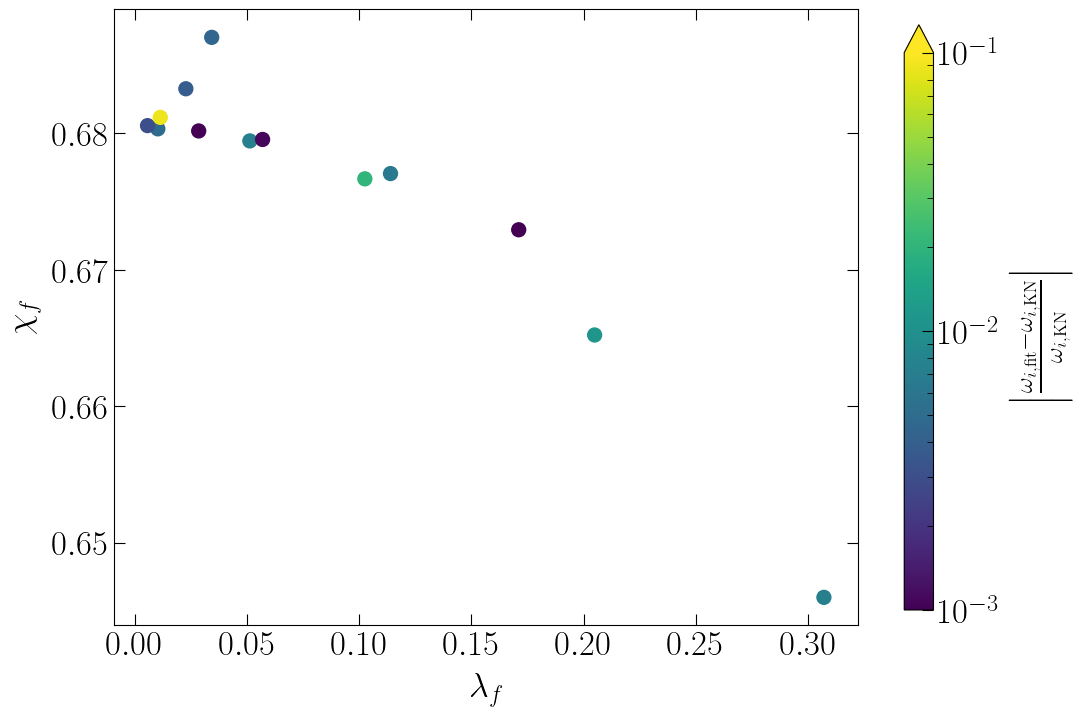

In [47]:
name_list=["1","5","10","20","30","o5","o10","o20","o30","s5","s10","s20","s30"]
q_f_list=np.zeros(len(name_list))
a_f_list=np.zeros(len(name_list))
z=np.zeros(len(name_list))
sizes=np.zeros(len(name_list))

for i_name in range(len(name_list)):
    with sd.SimDir("/home/yuntian/vscode_codes/QNM_compare/Kerr_Newman/"+name_list[i_name],\
                   pickle_file="/home/yuntian/vscode_codes/QNM_compare/Kerr_Newman/"+name_list[i_name]+".pickle") as sim:
        pass
    timeseries=sim.ts
    m1=timeseries.scalar["qlm_mass[0]"]
    m2=timeseries.scalar["qlm_mass[1]"]
    mt=timeseries.scalar["qlm_mass[2]"]
    s1=timeseries.scalar["qlm_spin[0]"]
    s2=timeseries.scalar["qlm_spin[1]"]
    s=timeseries.scalar["qlm_spin[2]"]
    q1=timeseries.scalar["qlm_charge[0]"]
    q2=timeseries.scalar["qlm_charge[1]"]
    q=timeseries.scalar["qlm_charge[2]"]
    psi4=sim.multipoles["psi4"][110.69]
    psi4_22=psi4[2,2]

    t=np.zeros(len(psi4_22.t))
    psi4_22_r=np.zeros(len(psi4_22.t))
    psi4_22_i=np.zeros(len(psi4_22.t))
    psi4_22_abs=np.zeros(len(psi4_22.t))

    for i in range(len(psi4_22.t)):
        t[i]=psi4_22.t[i]
        psi4_22_r[i]=psi4_22(psi4_22.t[i]).real
        psi4_22_i[i]=psi4_22(psi4_22.t[i]).imag
        psi4_22_abs[i]=(psi4_22_r[i]**2+psi4_22_i[i]**2)**(1/2)

    t_peak=t[np.argmax(psi4_22_abs)]
    index1=np.argmin(np.abs(t-t_peak))
    index2=np.argmin(np.abs(t-t_peak-100))+1
    t0_arr=np.linspace(0, 50, num = 501)

    M=1
    if(t_peak+100<t[-1]):
        M_f=mt(t_peak+100)
        a_f=s(t_peak+100)/M_f**2
        q_f=q(t_peak+100)/M_f 
    else:
        print("for "+name_list[i_name]+", t_peak = ",t_peak, "t_max = ",t[-1])
        M_f=mt(t[index2-1])
        a_f=s(t[index2-1])/M_f**2
        q_f=q(t[index2-1])/M_f 
    
    if(np.isnan(M_f) or np.isnan(a_f) or np.isnan(q_f)):
        print("for "+name_list[i_name]+"t_peak+100 gives nan")
        M_f=mt(t[index2-1])
        a_f=s(t[index2-1])/M_f**2
        q_f=q(t[index2-1])/M_f 

    q_f_list[i_name]=q_f
    a_f_list[i_name]=a_f
    sizes[i_name]=100

    num=0
    den=0
    for k in range(4):
        for j in range(4):
            num+=bkj_220i[k][j]*a_f**k*q_f**j
            den+=ckj_220i[k][j]*a_f**k*q_f**j

    omega_KN_i=(qnm.modes_cache(s=-2,l=2,m=2,n=0)(a=0)[0].imag*num/den)/M_f*M

    omega_fit_i=mode_record[i_name,4]
    z[i_name]=np.abs((omega_fit_i-omega_KN_i)/(omega_KN_i))

    # plt.plot(q_f,a_f,'.',markersize=20)

fig, ax =plt.subplots(1,1,figsize=(12,8), sharex=True, sharey=True)
sc1=[]
sc1.append(ax.scatter(q_f_list,a_f_list,c=z,s=sizes,cmap='viridis',norm=LogNorm(vmin=0.001,vmax=0.1)))
cbar1 = plt.colorbar(sc1[0], ax=ax, extend='max', shrink=0.95)
cbar1.set_label(r"$\left|\frac{\omega_{i,{\rm fit}}-\omega_{i,{\rm KN}}}{\omega_{i,{\rm KN}}}\right|$",fontsize=25)
# sc1[0].set_clim(0,0.1)
ax.set_xlabel(r"$\lambda_f$",fontsize=25)
ax.set_ylabel(r"$\chi_f$",fontsize=25)